## Probabilidades Condicionales  

Dado que $H$ y $N$ son independientes y equiprobables:

$$
P(H=0) = P(H=1) = 0.5
$$

$$
P(N=0) = P(N=1) = 0.5
$$

Podemos calcular las probabilidades condicionales:

Para $H = 0$:

$$
P_{Y|H}(0|0) = P(N=0) = 0.5
$$

$$
P_{Y|H}(1|0) = P(N=1) = 0.5
$$

$$
P_{Y|H}(2|0) = 0 \quad \text{(no es posible)}
$$

Para $H = 1$:

$$
P_{Y|H}(0|1) = 0 \quad \text{(no es posible)}
$$

$$
P_{Y|H}(1|1) = P(N=0) = 0.5
$$

$$
P_{Y|H}(2|1) = P(N=1) = 0.5
$$

Resumiendo:

$$
P_{Y|H}(y|0) =
\begin{cases} 
0.5, & \text{si } y=0 \\ 
0.5, & \text{si } y=1 \\ 
0, & \text{si } y=2 
\end{cases}
$$

$$
P_{Y|H}(y|1) =
\begin{cases} 
0, & \text{si } y=0 \\ 
0.5, & \text{si } y=1 \\ 
0.5, & \text{si } y=2 
\end{cases}
$$

---

## Nivel de decisión óptimo según el criterio ML  

El criterio de Máxima Verosimilitud (ML) elige $H=1$ cuando la observación $Y$ tiene mayor probabilidad bajo $P_{Y|H}(y|1)$ que bajo $P_{Y|H}(y|0)$.

- Para $Y=0$:

  $$
  P_{Y|H}(0|0) = 0.5, \quad P_{Y|H}(0|1) = 0
  $$

  **Decisión**: $H = 0$

- Para $Y=1$:

  $$
  P_{Y|H}(1|0) = 0.5, \quad P_{Y|H}(1|1) = 0.5
  $$

  **Cualquier decisión tiene igual probabilidad de error.**

- Para $Y=2$:

  $$
  P_{Y|H}(2|0) = 0, \quad P_{Y|H}(2|1) = 0.5
  $$

  **Decisión**: $H = 1$

### Nivel de decisión óptimo según ML: **1**


Nivel de decisión = 0, P_e = 0.4981
Nivel de decisión = 1, P_e = 0.2494
Nivel de decisión = 2, P_e = 0.2501


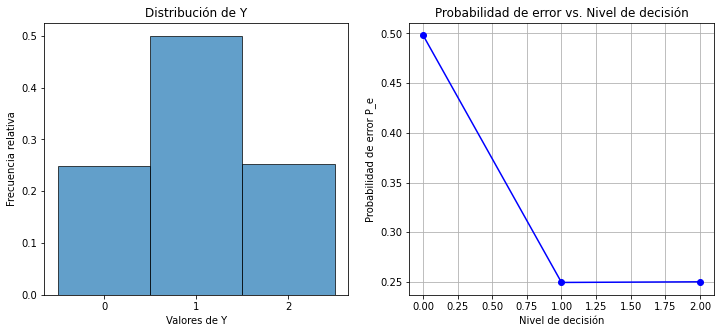

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Número de simulaciones
num_samples = 100000

# Generación de H y N de manera equiprobable
H = np.random.choice([0, 1], size=num_samples)  # Hipótesis transmitida
N = np.random.choice([0, 1], size=num_samples)  # Ruido aditivo

# Señal recibida en el receptor
Y = H + N

# Niveles de decisión
decision_levels = [0, 1, 2]
prob_errors = []

for threshold in decision_levels:
    H_estimated = (Y >= threshold).astype(int)  # Decisión basada en el umbral
    errors = (H_estimated != H).astype(int)  # Comparar con la hipótesis original
    Pe = np.mean(errors)  # Probabilidad de error
    prob_errors.append(Pe)
    print(f"Nivel de decisión = {threshold}, P_e = {Pe:.4f}")

# Graficamos la distribución de Y
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(Y, bins=np.arange(-0.5, 3, 1), edgecolor='black', alpha=0.7, density=True)
plt.xticks([0, 1, 2])
plt.xlabel("Valores de Y")
plt.ylabel("Frecuencia relativa")
plt.title("Distribución de Y")

# Graficamos la probabilidad de error en función del nivel de decisión
plt.subplot(1, 2, 2)
plt.plot(decision_levels, prob_errors, marker='o', linestyle='-', color='b')
plt.xlabel("Nivel de decisión")
plt.ylabel("Probabilidad de error P_e")
plt.title("Probabilidad de error vs. Nivel de decisión")
plt.grid()
plt.show()
